Connected to broker:  localhost
Subscribing to unibo/qak/events.
0  > evMsg= msg(androidsensor,event,android,none,androidsensor(stepcounter(61965.0)),4614)
20  > evMsg= msg(androidsensor,event,android,none,androidsensor(stepcounter(62012.0)),4634)
25  > evMsg= msg(androidsensor,event,android,none,androidsensor(stepcounter(62020.0)),4639)


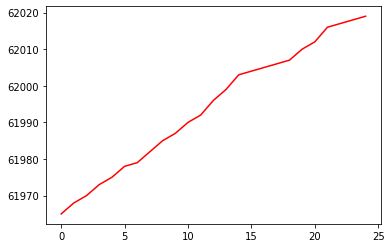

Done.


In [1]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt
import re

# Configuration
brokerAddr = "localhost"            # Mosquitto broker address
clientName = "mqttPlotQakEvents"    # Name of the client displayed on mosquitto
duration   = 30                     # Gather data for <duration> seconds
eventName  = "accelerometerlis3dh"  # Name of the sensor to track (use the names found in the android application)
N = 65                              # Number of messages to read from broker

# Init
goon     = True
msgnum   = 0 
x        = []
y        = []
z        = []


def on_message(client, userdata, message) :   #define callback
    global msgnum,  x,y,z, goon
    if not goon :
        return
    # msg(androidSensor,event,android,none,androidSensor(sensorname(X,Y,Z)),MSGNUM)
    # es. msg(androidSensor,event,gyroSender,none,androidSensor(accelerometerlis3dh(X,Y,Z)),MSGNUM)
    # Note: stepcounter only has one field: msg(androidSensor,event,android,none,androidSensor(stepcounter(X)),MSGNUM)
    evMsg = str( message.payload.decode("utf-8")  )
    msgitems = re.split(',|\(|\)', evMsg)
    #msgitems = ["msg", "androidSensor", "event" , 
    #            "android", "none", "androidSensor",
    #            "accelerometerlis3dh", "X", "Y", "Z", "MSGNUM"
    if eventName == msgitems[6]  :
        if msgnum < N  :
            # Print some of the messages to check data
            if msgnum % 20 == 0  :
                print(msgnum, " > evMsg=", evMsg )
            msgnum = msgnum + 1 
            # If stepcounter, only append x, since y and z do not exist.
            x.append( float( msgitems[7] ) )
            if eventName != "stepcounter"  :
                y.append( float( msgitems[8] ) )
                z.append( float( msgitems[9] ) )
        else  :
            print(msgnum, " > evMsg=", evMsg )
            # Comment and decomment to plot different values of the sensor
            plt.plot(list(x), color='red
            plt.plot(list(y), color='green')
            plt.plot(list(z), color='blue')
            plt.show()
            goon = False
            client.disconnect()
    
client= paho.Client(clientName)      
client.on_message=on_message               # Bind function to callback

client.connect(brokerAddr)                 #connect
print("Connected to broker: ", brokerAddr)
print("Subscribing to unibo/qak/events.")
client.subscribe("unibo/qak/events")       #subscribe

print("Collecting values; please wait ..." )
client.loop_start()                        #start loop to process received messages
time.sleep(duration)
client.disconnect()                        #disconnect
print("Done.")
client.loop_stop()                         #stop loop